In [1]:
# Kerakli kutubxonalarni chaqirib olamiz
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# CSV fayldan ma'lumotlarni yuklaymiz
df = pd.read_csv("C:/Users/user/Desktop/Data.csv")

In [5]:
df

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,1,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,8,6,4,3,4,10,6,1,4


In [7]:

# Ma'lumotlar qanday ko'rinishda ekanligini tekshirib olamiz
print(df.head())

   Sample code number  Clump Thickness  Uniformity of Cell Size  \
0             1000025                5                        1   
1             1002945                5                        4   
2             1015425                3                        1   
3             1016277                6                        8   
4             1017023                4                        1   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                         1                  1                            2   
3                         8                  1                            3   
4                         1                  3                            2   

   Bare Nuclei  Bland Chromatin  Normal Nucleoli  Mitoses  Class  
0            1                3                1       

In [11]:
# Xususiyatlar (features) va maqsad (target) ustunlarini aniqlaymiz
# Misol uchun: Agar CSV da 'feature' va 'target' degan ustunlar bo'lsa
X = df[['Clump Thickness']]  # Kiruvchi ma'lumotlar (masalan, x qiymatlari)
y = df['Class']     # Chiquvchi ma'lumot (masalan, y qiymati)

In [13]:
X

,Clump Thickness
0,5
1,5
2,3
3,6
4,4
...,...
678,3
679,2
680,5
681,4


In [15]:
y

0      2
1      2
2      2
3      2
4      2
      ..
678    2
679    2
680    4
681    4
682    4
Name: Class, Length: 683, dtype: int64

In [17]:
# Ma'lumotlarni train va test ga ajratamiz (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
# Random Forest Regressor modelini yaratamiz
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [21]:
# Modelni o'qitamiz (train set)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [23]:
# Test ma'lumotlariga asoslanib bashorat (predict) qilamiz
y_pred = model.predict(X_test)

In [25]:
# Modelni baholaymiz
mse = mean_squared_error(y_test, y_pred)  # O'rtacha kvadrat xato
r2 = r2_score(y_test, y_pred)             # R^2 skori (model qanchalik yaxshi)

In [27]:
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error (MSE): 0.41
R^2 Score: 0.56


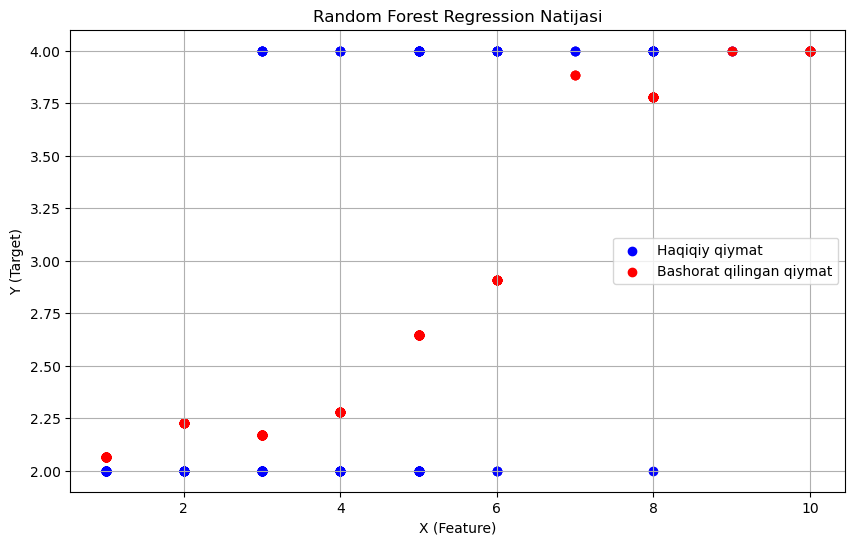

In [29]:
# Grafik chizamiz
# Testdagi haqiqiy qiymatlar va model bashorat qilgan qiymatlarni solishtiramiz
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label="Haqiqiy qiymat")  # Haqiqiy qiymatlarni chizamiz
plt.scatter(X_test, y_pred, color='red', label="Bashorat qilingan qiymat")  # Model bashorati
plt.title("Random Forest Regression Natijasi")
plt.xlabel("X (Feature)")
plt.ylabel("Y (Target)")
plt.legend()
plt.grid(True)
plt.show()